# Project 10

Maja Andrzejczuk, Maciej Orsłowski

In [1]:
import os

import numpy as np
import pandas as pd
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Load all graphs

In [2]:
def read_graph(name: str) -> nx.Graph:
    data_folder = './data'
    loaded_matrix = pd.read_csv(f'{data_folder}/{name}.csv', header=None)
    graph = nx.from_numpy_array(loaded_matrix.values)
    return graph

In [3]:
graphs = {}

for name in ['D1-K=2', 'D1-UNC', 'D2-K=7', 'D2-UNC', 'D3-K=12', 'D3-UNC']:
    graphs[name] = read_graph(name)

# Implementation

We chose a spectral method

In [4]:
def community_detection_spectral_method(graph: nx.Graph, k_values: list[int]):
    adj_matrix = nx.to_numpy_array(graph)
    degree_arr = adj_matrix.sum(axis=1)
    
    d_inv_sqrt = np.diag(1.0 / np.sqrt(degree_arr))
    laplacian = np.eye(len(adj_matrix)) - d_inv_sqrt @ adj_matrix @ d_inv_sqrt
    
    _, eig_vectors = np.linalg.eigh(laplacian)
    
    all_labels = []
    silhouette_scores = []

    for k in k_values:
        eig_vectors_k = eig_vectors[:, :k]
        
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels = kmeans.fit_predict(eig_vectors_k)
        
        all_labels.append({node: labels[i] for i, node in enumerate(graph.nodes)})
        
        silhouette = silhouette_score(eig_vectors_k, labels)
        silhouette_scores.append(silhouette)

    return all_labels, silhouette_scores


# Experiments with a known K

In [5]:
def visualise_communities_known(graph_name: str, k: int):
    g = graphs[graph_name]

    communities, _ = community_detection_spectral_method(g, [k])
    communities = communities[0]

    # save results for competition
    df = pd.DataFrame(list(communities.items()), columns=['Node', 'Cluster'])
    df['Node'] += 1
    file_path = f'./results/{graph_name}.csv'
    os.makedirs('results', exist_ok=True)
    df.to_csv(file_path, index=False, header=False)

    # plot results
    node_color = [communities[node] for node in g.nodes()]

    plt.figure(figsize=(8, 6))

    pos = nx.spring_layout(g, seed=28)
    nx.draw_networkx_nodes(g, pos, node_size=70, node_color=node_color, cmap='viridis')
    nx.draw_networkx_edges(g, pos, alpha=0.6, edge_color='grey', width=0.5)

    plt.title(f'Graph {graph_name}')
    plt.axis('off')
    plt.show()

## D1-K=2

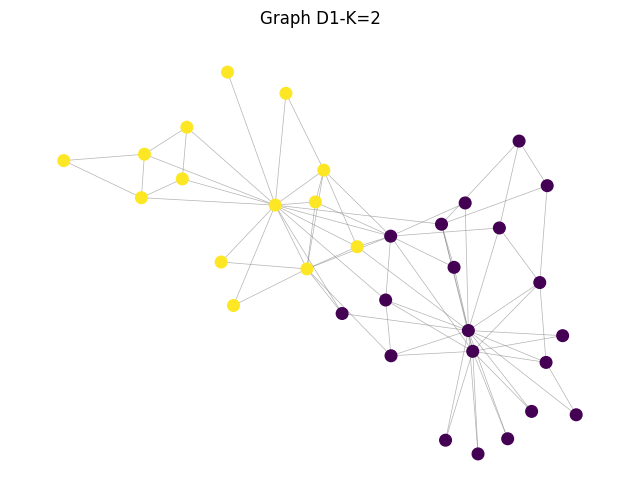

In [6]:
visualise_communities_known('D1-K=2', 2)

## D2-K=7

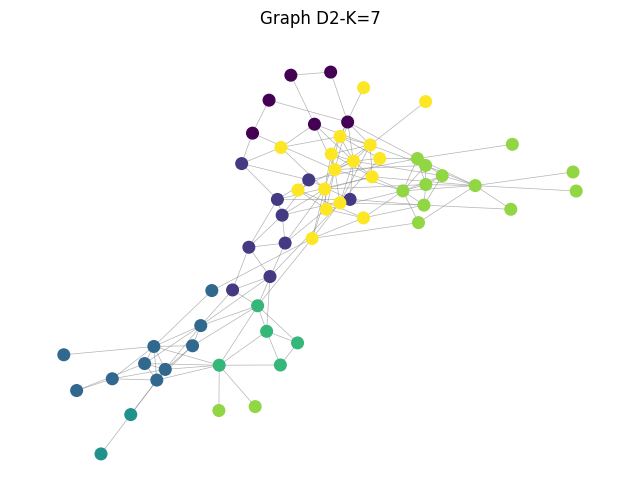

In [7]:
visualise_communities_known('D2-K=7', 7)

## D3-K=12

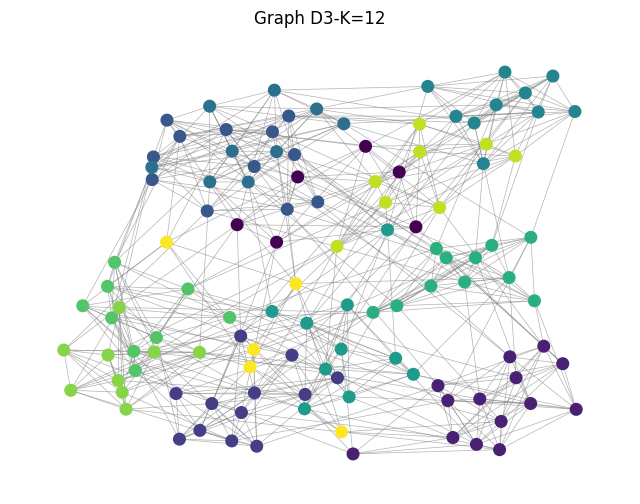

In [8]:
visualise_communities_known('D3-K=12', 12)

# Experiments with unknown K

In [9]:
def visualise_silhouette_for_communities(graph_name: str, k_min: int, k_max: int):
    k_values = list(range(k_min, k_max+1))
    g = graphs[graph_name]
    
    _, silhouette_values = community_detection_spectral_method(g, k_values)

    plt.figure(figsize=(8, 6))

    plt.plot(k_values, silhouette_values, marker='o', linestyle='-', color='g')
    plt.title(f'Silhouette Score vs Number of Communities (k) for {graph_name}')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

    plt.show()

## D1-UNC

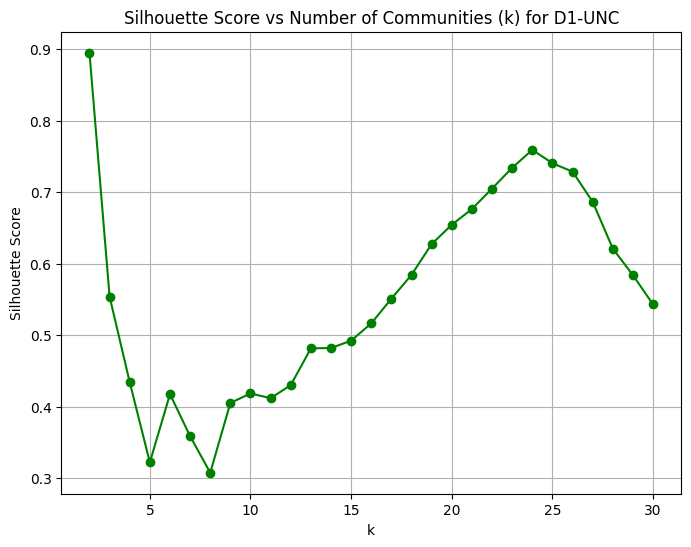

In [10]:
visualise_silhouette_for_communities('D1-UNC', k_min=2, k_max=30)

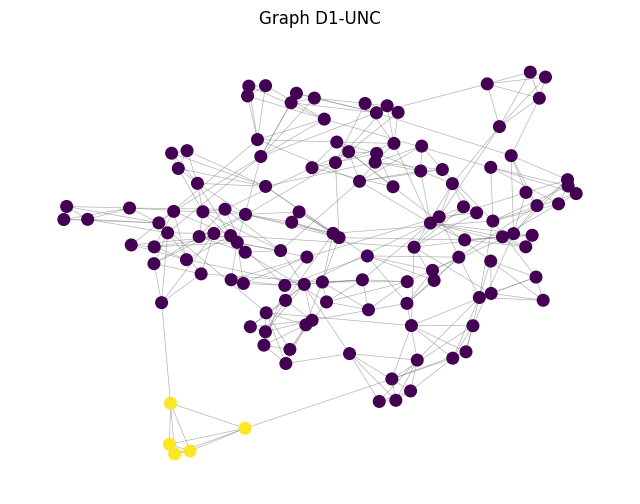

In [11]:
visualise_communities_known('D1-UNC', 2)

## D2-UNC

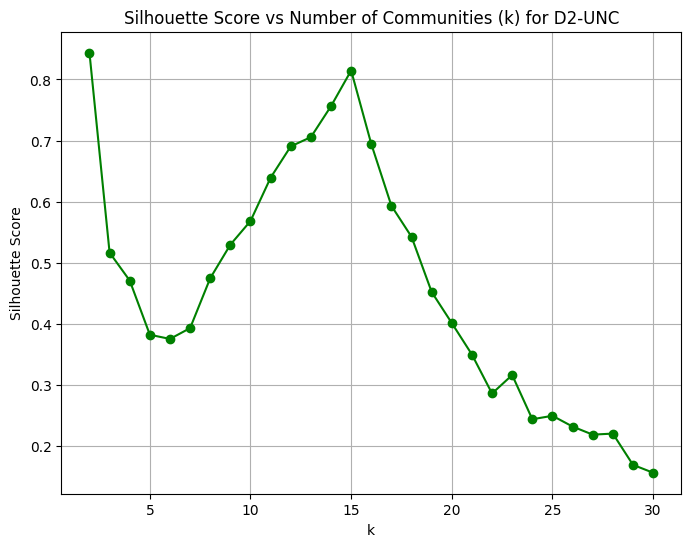

In [12]:
visualise_silhouette_for_communities('D2-UNC', k_min=2, k_max=30)

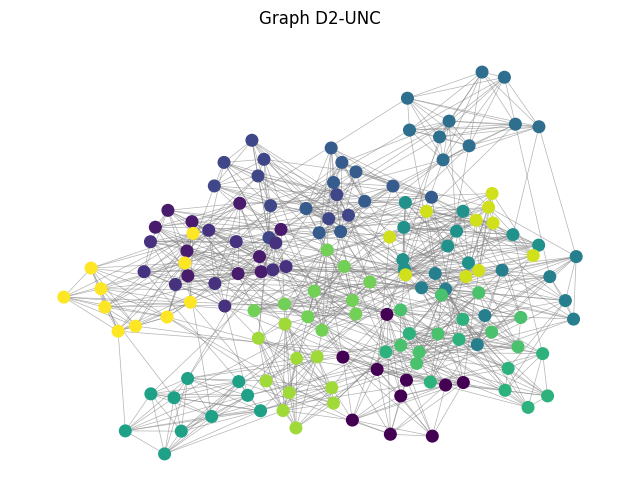

In [13]:
visualise_communities_known('D2-UNC', 15)

## D3-UNC

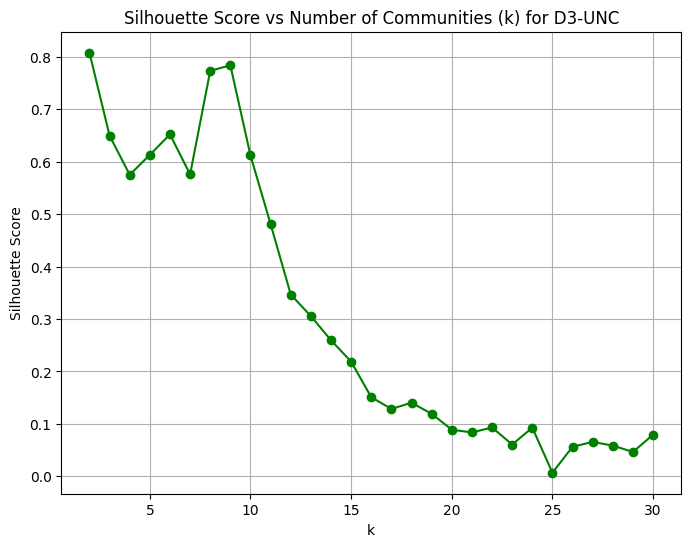

In [14]:
visualise_silhouette_for_communities('D3-UNC', k_min=2, k_max=30)

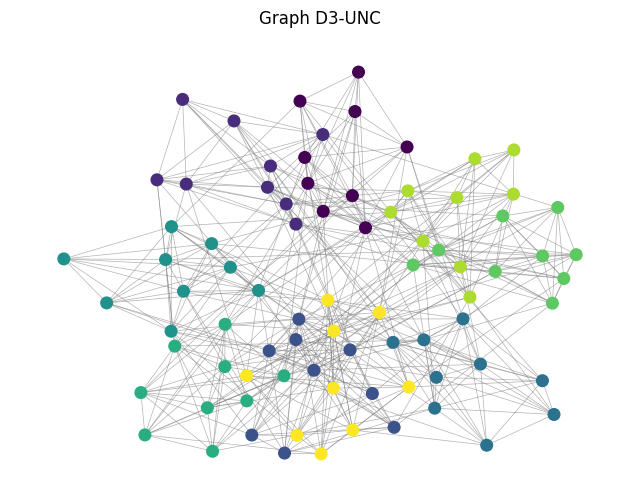

In [15]:
visualise_communities_known('D3-UNC', 9)